# Flower Classification using Xception Model

### Import Dependencies

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
tf.config.experimental.get_device_details(tf.config.experimental.list_physical_devices()[1])

{'compute_capability': (6, 1), 'device_name': 'NVIDIA GeForce GTX 1070'}

In [2]:
from tensorflow import keras

### Load Flower Dataset
Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

No. of Classes: 5

Classes: Lilly, Lotus, Orchid, Sunflower, Tulip

Total Images: 5000 

In [3]:
input_shape = (299, 299, 3)
image_shape = (299, 299)
num_classes = 5
batch_size = 32

train_data, val_data = keras.utils.image_dataset_from_directory('flower_images', batch_size=batch_size, image_size=image_shape, label_mode='categorical', seed=225, validation_split= 0.2, subset='both')

Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Using 999 files for validation.


### Xception Model Definition

In [10]:
input = keras.Input(shape=(input_shape))

# Entry Flow
x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(input)
x1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)

xp1 = keras.layers.Conv2D(filters=128, kernel_size=1, strides=2, padding='same')(x1)
xp2 = keras.layers.Conv2D(filters=256, kernel_size=1, strides=2, padding='same')(xp1)
xp3 = keras.layers.Conv2D(filters=728, kernel_size=1, strides=2, padding='same')(xp2)

x = keras.layers.SeparableConv2D(filters=128, kernel_size=3, padding='same')(x1)
x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=128, kernel_size=3, padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = keras.layers.Add()([xp1, x])

x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=256, kernel_size=3, padding='same')(x)
x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=256, kernel_size=3, padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = keras.layers.Add()([xp2, x])

x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
xm = keras.layers.Add()([xp3, x])

# Middle Flow
for i in range(8):
    x = keras.layers.ReLU()(x)
    x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
    xm = keras.layers.Add()([xm, x])
    

# Exit Flow
xp4 = keras.layers.Conv2D(filters=1024, kernel_size=1, strides=2, padding='same')(xm)

x = keras.layers.ReLU()(xm)
x = keras.layers.SeparableConv2D(filters=728, kernel_size=3, padding='same')(x)
x = keras.layers.ReLU()(x)
x = keras.layers.SeparableConv2D(filters=1024, kernel_size=3, padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = keras.layers.Add()([x, xp4])


x = keras.layers.SeparableConv2D(filters=1536, kernel_size=3, padding='same')(x)
x = keras.layers.ReLU()(x)

x = keras.layers.SeparableConv2D(filters=2048, kernel_size=3, padding='same')(x)
x = keras.layers.ReLU()(x)
x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dense(units=512, activation='relu')(x)
x = keras.layers.Dense(units=512, activation='relu')(x)
output = keras.layers.Dense(units=num_classes, activation='softmax')(x)



model = keras.Model(input, output, name='Xception')

In [7]:
model.summary()

Model: "Xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 150, 150, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 150, 150, 64  36928       ['conv2d_6[0][0]']               
                                )                                                          

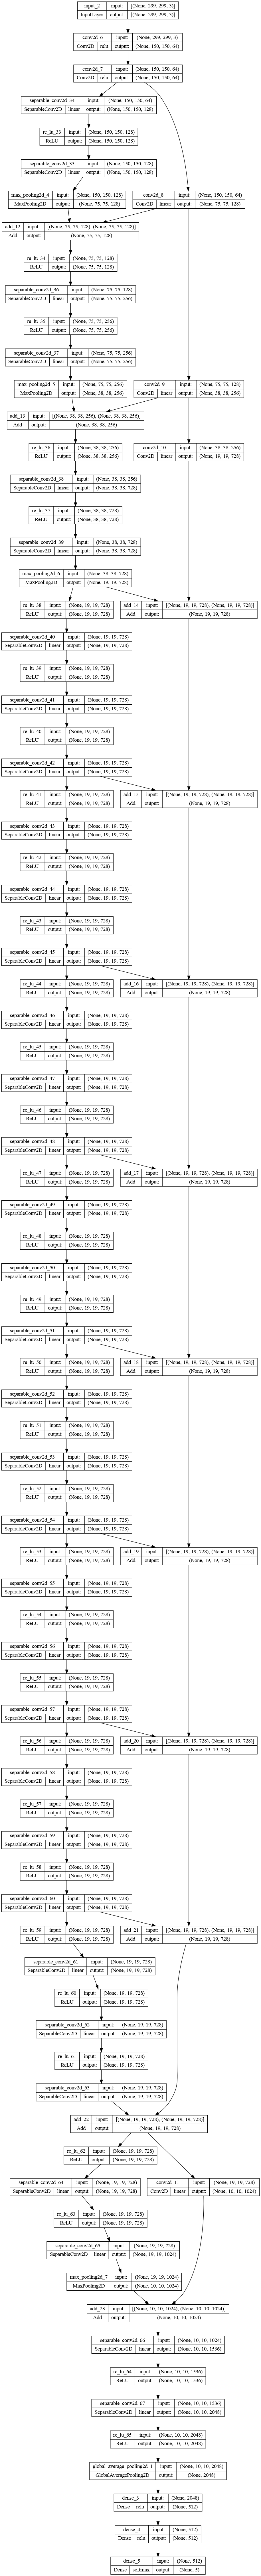

In [8]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='Xception.png')

### Model Training

In [11]:
model.compile(optimizer='rmsprop', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, batch_size=batch_size, callbacks=[keras.callbacks.TensorBoard()], epochs=100)

Epoch 1/100
125/125 [==============================] - 129s 880ms/step - loss: 1.5113 - accuracy: 0.3075 - val_loss: 1.3056 - val_accuracy: 0.4284
Epoch 2/100
125/125 [==============================] - 114s 909ms/step - loss: 1.3361 - accuracy: 0.4015 - val_loss: 1.2504 - val_accuracy: 0.4715
Epoch 3/100
125/125 [==============================] - 115s 899ms/step - loss: 1.2894 - accuracy: 0.4295 - val_loss: 1.2289 - val_accuracy: 0.4825
Epoch 4/100
125/125 [==============================] - 113s 903ms/step - loss: 1.2567 - accuracy: 0.4675 - val_loss: 1.1600 - val_accuracy: 0.5335
Epoch 5/100
125/125 [==============================] - 116s 925ms/step - loss: 1.2245 - accuracy: 0.4942 - val_loss: 1.1512 - val_accuracy: 0.5566
Epoch 6/100
125/125 [==============================] - 114s 913ms/step - loss: 1.1941 - accuracy: 0.5030 - val_loss: 1.1243 - val_accuracy: 0.5485
Epoch 7/100
125/125 [==============================] - 117s 935ms/step - loss: 1.1817 - accuracy: 0.5148 - val_loss: 1

### Plotting History

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot: >

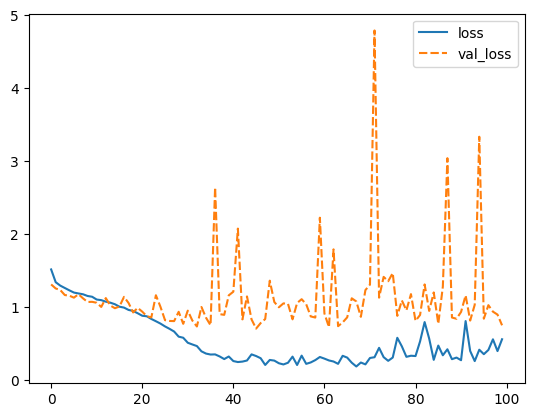

In [19]:
sb.lineplot(data={'loss': history.history['loss'], 'val_loss':history.history['val_loss']})

<AxesSubplot: >

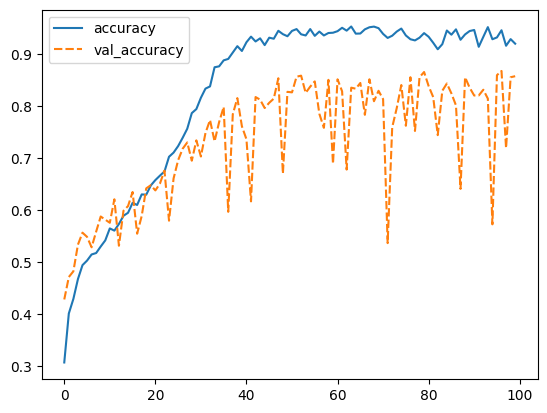

In [20]:
sb.lineplot(data={'accuracy': history.history['accuracy'], 'val_accuracy':history.history['val_accuracy']})